# Minimal example using tensorflow

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data generation  

In [20]:
# inputs
observations = 1000
xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(low=-10,high=10,size=(observations,1))
generated_inputs = np.column_stack((xs,zs))
# target 
noise = np.random.uniform(low= -1, high = 1, size=(observations,1))
generated_targets = 2*xs - 3*zs + 5 + noise
# saving your dataset
np.savez('TF_intro', inputs= generated_inputs, targets= generated_targets)

###  solving with tensorflow

In [21]:
training_data = np.load('TF_intro.npz')
input_size = 2
output_size = 1

In [22]:
# build the model 

# Sequential is a method that specifies how the model will be laid down ('stacks layers')
# Dense takes the inputs provided to the model and calculates the dot product of the input
# and the weights and add the biases also applies activation function we need to provide only the output size
model = tf.keras.Sequential([
                               tf.keras.layers.Dense(output_size,
                                                     kernel_initializer= tf.random_uniform_initializer(minval=0.1, maxval=0.1),
                                                     bias_initializer= tf.random_uniform_initializer(minval=0.1, maxval=0.1)
                                                    ) 
                            ])
# compile configures the model for training

# custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.2)

model.compile(optimizer = 'sgd', loss = 'mean_squared_error')

# fit : trains the model
model.fit(training_data['inputs'], training_data['targets'], epochs = 100, verbose = 2)

Train on 1000 samples
Epoch 1/100
1000/1000 - 0s - loss: 33.1856
Epoch 2/100
1000/1000 - 0s - loss: 4.6055
Epoch 3/100
1000/1000 - 0s - loss: 1.5288
Epoch 4/100
1000/1000 - 0s - loss: 0.6719
Epoch 5/100
1000/1000 - 0s - loss: 0.4423
Epoch 6/100
1000/1000 - 0s - loss: 0.3761
Epoch 7/100
1000/1000 - 0s - loss: 0.3627
Epoch 8/100
1000/1000 - 0s - loss: 0.3517
Epoch 9/100
1000/1000 - 0s - loss: 0.3478
Epoch 10/100
1000/1000 - 0s - loss: 0.3510
Epoch 11/100
1000/1000 - 0s - loss: 0.3574
Epoch 12/100
1000/1000 - 0s - loss: 0.3503
Epoch 13/100
1000/1000 - 0s - loss: 0.3515
Epoch 14/100
1000/1000 - 0s - loss: 0.3471
Epoch 15/100
1000/1000 - 0s - loss: 0.3538
Epoch 16/100
1000/1000 - 0s - loss: 0.3475
Epoch 17/100
1000/1000 - 0s - loss: 0.3529
Epoch 18/100
1000/1000 - 0s - loss: 0.3503
Epoch 19/100
1000/1000 - 0s - loss: 0.3541
Epoch 20/100
1000/1000 - 0s - loss: 0.3516
Epoch 21/100
1000/1000 - 0s - loss: 0.3577
Epoch 22/100
1000/1000 - 0s - loss: 0.3576
Epoch 23/100
1000/1000 - 0s - loss: 0.35

### Extract weights and biases

In [6]:
model.layers[0].get_weights()

[array([[ 1.9750358],
        [-2.9718256]], dtype=float32),
 array([5.042316], dtype=float32)]

### Extract outputs (make predictions) 

In [18]:
# calculate the output given the input
model.predict_on_batch(training_data['inputs'])

<tf.Tensor: shape=(1000, 1), dtype=float32, numpy=
array([[ 4.44753609e+01],
       [ 1.57913704e+01],
       [-6.16796446e+00],
       [ 3.44255028e+01],
       [ 5.86577415e+00],
       [-1.45142097e+01],
       [ 2.74146729e+01],
       [ 4.98592262e+01],
       [ 2.17715111e+01],
       [-1.61008739e+01],
       [ 2.38731041e+01],
       [ 3.32630386e+01],
       [-2.34924641e+01],
       [-1.87307472e+01],
       [ 2.43306332e+01],
       [-1.37392235e+00],
       [-9.24084663e+00],
       [ 4.36594658e+01],
       [-9.23400402e-01],
       [ 7.16432714e+00],
       [-2.88194237e+01],
       [-6.53097677e+00],
       [-1.95947886e+00],
       [ 2.15224895e+01],
       [ 2.27926407e+01],
       [-6.74996805e+00],
       [ 2.16393566e+01],
       [ 2.14530678e+01],
       [ 3.37185860e+00],
       [ 1.80577469e+01],
       [ 1.42624607e+01],
       [-2.20484066e+00],
       [ 2.55502319e+00],
       [ 7.76619434e-01],
       [ 3.85097046e+01],
       [ 2.27929344e+01],
       [ 1.56

In [26]:
training_data['targets']

array([[ 12.23289892],
       [-27.20418051],
       [ 18.58863873],
       [ 21.66313583],
       [ -7.36955416],
       [ 37.66797761],
       [ 11.37808987],
       [ 12.49768683],
       [-11.78780793],
       [ 27.22881324],
       [ 18.75023445],
       [ 11.65619396],
       [ 46.00764684],
       [  5.30693349],
       [  2.36212888],
       [  2.72208491],
       [  6.41643408],
       [-21.57426264],
       [-11.54534226],
       [-30.64536801],
       [-39.7785956 ],
       [ 39.84553616],
       [-15.38376024],
       [ 29.90369467],
       [-29.82477647],
       [-24.64217984],
       [ 15.33526354],
       [ 30.68314438],
       [ 10.42319945],
       [ -9.68572753],
       [-10.24496692],
       [ -7.87424453],
       [-14.78095321],
       [ -8.11736454],
       [ -1.43356494],
       [ 17.38097785],
       [  1.26079956],
       [ -3.18608261],
       [ -0.95463089],
       [ -6.01769056],
       [  1.59292576],
       [ 19.02839399],
       [ 22.79753796],
       [ 17

### plot the output against the target

<function matplotlib.pyplot.show(*args, **kw)>

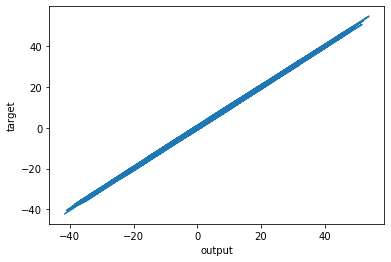

In [25]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('output')
plt.ylabel('target')
plt.show